In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mental-health-data/Mental Health Data.csv


## 1. Import Libraries

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import randint
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.datasets import make_classification
from sklearn.preprocessing import binarize, LabelEncoder, MinMaxScaler

## 2. Reading and Cleaning

In [3]:
df_MHdata=pd.read_csv("/kaggle/input/mental-health-data/Mental Health Data.csv")

In [4]:
## checking the dataframe
df_MHdata.head(n=3)

,Are you self-employed?,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health concerns and options for seeking help?,"If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:",Would you feel comfortable discussing a mental health disorder with your coworkers?,...,"If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?","If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?",What is your age?,What is your gender?,What country do you live in?,What US state or territory do you live in?,What country do you work in?,What US state or territory do you work in?,Which of the following best describes your work position?,Do you work remotely?
0,0,1 to 5,1.0,NaN,Yes,Yes,No,No,Somewhat difficult,Maybe,...,Sometimes,Often,33,Male,Canada,NaN,Canada,NaN,Back-end Developer,Sometimes
1,0,1 to 5,1.0,NaN,No,No,No,I don't know,Very easy,Yes,...,Not applicable to me,Not applicable to me,40,male,Netherlands,NaN,Netherlands,NaN,Front-end Developer|Back-end Developer,Sometimes
2,0,1 to 5,1.0,NaN,Yes,Yes,No,I don't know,I don't know,Maybe,...,Not applicable to me,Not applicable to me,21,male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer|DevOps/SysAdmin,Never


In [5]:
## shape of the dataframe
df_MHdata.shape

(1433, 31)

In [6]:
## Rename the columns
a=list(df_MHdata.columns)
b=['self_employed','no_of_employees','tech_company','role_IT','mental_healthcare_coverage',
  'knowledge_about_mental_healthcare_options_workplace','employer_discussed_mental_health ',
  'employer_offer_resources_to_learn_about_mental_health','medical_leave_from_work ',
  'comfortable_discussing_with_coworkers','employer_take_mental_health_seriously',
   'knowledge_of_local_online_resources ','productivity_affected_by_mental_health ',
   'percentage_work_time_affected_mental_health','openess_of_family_friends',
  'family_history_mental_illness','mental_health_disorder_past',
   'currently_mental_health_disorder','diagnosed_mental_health_condition',
   'type_of_disorder','treatment_from_professional',
   'while_effective_treatment_mental_health_issue_interferes_work',
  'while_not_effective_treatment_interferes_work ','age','gender','country','US state',
  'country work ','US state work','role_in_company','work_remotely','']
for i,j in zip(a,b):
    df_MHdata.rename(columns={i:j},inplace=True)

In [7]:
## information of Dataframe
df_MHdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1433 entries, 0 to 1432
Data columns (total 31 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   self_employed                                                  1433 non-null   int64  
 1   no_of_employees                                                1146 non-null   object 
 2   tech_company                                                   1146 non-null   float64
 3   role_IT                                                        263 non-null    float64
 4   mental_healthcare_coverage                                     1146 non-null   object 
 5   knowledge_about_mental_healthcare_options_workplace            1013 non-null   object 
 6   employer_discussed_mental_health                               1146 non-null   object 
 7   employer_offer_resources_to_learn_about_mental_health       

In [8]:
## No of Missing values in different Columns
columns=df_MHdata.columns
pd.DataFrame({'no of missing values':df_MHdata.isnull().sum()})

,no of missing values
self_employed,0
no_of_employees,287
tech_company,287
role_IT,1170
mental_healthcare_coverage,287
knowledge_about_mental_healthcare_options_workplace,420
employer_discussed_mental_health,287
employer_offer_resources_to_learn_about_mental_health,287
medical_leave_from_work,287
comfortable_discussing_with_coworkers,287


In [9]:
## copy the dataset in df1
df1=df_MHdata.copy()

In [10]:
## Drop the unnecessary colums 
cols = ['role_IT','knowledge_of_local_online_resources ',
        'productivity_affected_by_mental_health ',
        'percentage_work_time_affected_mental_health']
df_red=df1.drop(cols,axis=1)

#### 2.1 Cleaning Different Columns

In [11]:
## No of Employees column
df_red.no_of_employees.unique()

array(['1 to 5', '6 to 25', '26-99', '100-500', '26-100', '500-1000',
       'More than 1000', nan], dtype=object)

In [12]:
df_red.no_of_employees.replace(to_replace=['1 to 5', '6 to 25','More than 1000','26-99'],
                                value=['1-5','6-25','>1000','26-100'],inplace=True)

In [13]:
df_red.no_of_employees.value_counts()

26-100      326
>1000       256
100-500     248
6-25        176
500-1000     80
1-5          60
Name: no_of_employees, dtype: int64

In [14]:
## Cleaning Mental Health Care coverage column
df_red.mental_healthcare_coverage.unique()

array(['Yes', 'No', "I don't know", 'Not eligible for coverage / N/A',
       nan], dtype=object)

In [15]:
df_red.mental_healthcare_coverage.replace(to_replace=['Not eligible for coverage / N/A'],
                                value='No',inplace=True)
df_red.mental_healthcare_coverage.unique()

array(['Yes', 'No', "I don't know", nan], dtype=object)

In [16]:
## Cleaning openess_of_family_friends column
df_red.openess_of_family_friends.unique()

array(['Somewhat open', 'Very open', 'Somewhat not open', 'Neutral',
       'Not applicable to me (I do not have a mental illness)',
       'Not open at all'], dtype=object)

In [17]:
df_red.openess_of_family_friends.replace(to_replace=['Not applicable to me (I do not have a mental illness)']
                                          ,value="I don't know",inplace=True)
df_red.openess_of_family_friends.unique()

array(['Somewhat open', 'Very open', 'Somewhat not open', 'Neutral',
       "I don't know", 'Not open at all'], dtype=object)

In [18]:
## Cleaning the age column remove outliers
med_age = df_red[(df_red['age'] >= 18) | (df_red['age'] <= 75)]['age'].median()
df_red['age'].replace(to_replace = df_red[(df_red['age'] < 18) | (df_red['age'] > 75)]['age'].tolist(),
                          value = med_age, inplace = True)

In [19]:
## Cleaning the gender column
df_red.gender.unique()

array(['Male', 'male', 'F', 'Transitioned, M2F', 'Other/Transfeminine',
       'M', 'female', 'm', 'Female', 'f', 'non-binary', 'woman', 'male ',
       'Male ', 'Bigender', 'Genderfluid (born female)',
       'male 9:1 female, roughly', 'Male (cis)', 'Other', 'Sex is male',
       'genderqueer', 'Human', 'mail', 'Cis-woman',
       'female-bodied; no feelings about gender', 'Transgender woman',
       'Genderfluid', 'female ', 'Male/genderqueer', 'fem', 'Nonbinary',
       ' Female', 'Female ', 'Genderqueer', nan, 'I identify as female.',
       'fm', 'Cis female ', 'female/woman', 'Androgynous', 'man',
       'nb masculine', 'Cisgender Female', 'Woman', 'Cis Male',
       'Female or Multi-Gender Femme', 'Male.', 'Enby', 'Agender',
       'Female (props for making this a freeform field, though)',
       'cis man', 'Female assigned at birth ', 'Cis male', 'Man',
       'none of your business', 'cis male', 'genderqueer woman', 'Queer',
       'Dude', 'Male (trans, FtM)', 'cisdude', 'Gen

In [20]:
df_red['gender'].replace(to_replace = ['Male', 'male', 'Male ', 'M', 'm',
       'man', 'Cis male', 'Male.', 'male 9:1 female, roughly', 'Male (cis)', 'Man', 'Sex is male',
       'cis male', 'Malr', 'Dude', "I'm a man why didn't you make this a drop down question. You should of asked sex? And I would of answered yes please. Seriously how much text can this take? ",
       'mail', 'M|', 'Male/genderqueer', 'male ',
       'Cis Male', 'Male (trans, FtM)',
       'cisdude', 'cis man', 'MALE'], value = 'male', inplace = True)
df_red['gender'].replace(to_replace = ['Female', 'female', 'I identify as female.', 'female ',
       'Female assigned at birth ', 'F', 'Woman', 'fm', 'f', 'Cis female ', 'Transitioned, M2F',
       'Genderfluid (born female)', 'Female or Multi-Gender Femme', 'Female ', 'woman', 'female/woman',
       'Cisgender Female', 'fem', 'Female (props for making this a freeform field, though)',
       ' Female', 'Cis-woman', 'female-bodied; no feelings about gender',
       'AFAB'], value = 'female', inplace = True)
df_red['gender'].replace(to_replace = ['Bigender', 'non-binary', 'Other/Transfeminine',
       'Androgynous', 'Other', 'nb masculine',
       'none of your business', 'genderqueer', 'Human', 'Genderfluid',
       'Enby', 'genderqueer woman', 'mtf', 'Queer', 'Agender', 'Fluid',
       'Nonbinary', 'human', 'Unicorn', 'Genderqueer',
       'Genderflux demi-girl', 'Transgender woman'], value = 'other', inplace = True)

In [21]:
df_red.gender.unique()

array(['male', 'female', 'other', nan], dtype=object)

In [22]:
## Cleaning the role_in_company
tech_list = []
tech_list.append(df_red[df_red['role_in_company'].str.contains('Back-end')]['role_in_company'].tolist())
tech_list.append(df_red[df_red['role_in_company'].str.contains('Front-end')]['role_in_company'].tolist())
tech_list.append(df_red[df_red['role_in_company'].str.contains('Dev')]['role_in_company'].tolist())
tech_list.append(df_red[df_red['role_in_company'].str.contains('DevOps')]['role_in_company'].tolist())
flat_list = [item for sublist in tech_list for item in sublist]
flat_list = list(dict.fromkeys(flat_list))

In [23]:
## Replace tech role=1 and other=0 in a new tech role operation
df_red['tech_role']=df_red['role_in_company']
df_red['tech_role'].replace(to_replace=flat_list,value=1,inplace=True)
remain_list=df_red['tech_role'].unique()[1:]
df_red['tech_role'].replace(to_replace=remain_list,value=0,inplace=True)

In [24]:
df_red.tech_role.value_counts()

1    1045
0     388
Name: tech_role, dtype: int64

In [25]:
df_red=df_red.drop(['role_in_company'],axis=1)

#### 2.2 Handling Missing Values

In [26]:
df_rej=pd.concat([df_red['type_of_disorder'],df_red['US state'],df_red['US state work']],axis=1)
df_red=df_red.drop(['type_of_disorder','US state','US state work'],axis=1)

In [27]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imp.fit(df_red)
imp_data=pd.DataFrame(data=imp.transform(df_red),columns=df_red.columns)

In [28]:
df_eda=pd.concat([imp_data,df_rej],axis=1)
df_eda.isnull().sum().to_frame()

,0
self_employed,0
no_of_employees,0
tech_company,0
mental_healthcare_coverage,0
knowledge_about_mental_healthcare_options_workplace,0
employer_discussed_mental_health,0
employer_offer_resources_to_learn_about_mental_health,0
medical_leave_from_work,0
comfortable_discussing_with_coworkers,0
employer_take_mental_health_seriously,0


## 3. EDA

##### A. Questions with regard to the Target: 
1. If a person is self employed then is there a higher chance of mental disorder?
2. Does big size of the company affect your mental health condition adversely?
3. Does working in a tech company affect adversely to your mental well being?
4. Does the employers discussion on mental health reduces the chance of getting postive diagonised?
5. Will offering more options to learn about mental health reduces the chance of getting positive?
6. Does providing no leaves increases the less reporting of mental health issues?
9. Does discussion with coworkers about mental health care reduces the chance of positive diagonosis?
10. If Employer takes mental health seriously, then will it reduce the chance of positive diagonosis?
11. If family friends are open about the mental health then will it reduce the positive diagonosis?
12. What are the chances that if a person having family history of mental illness then he is diagonised positive?
13. Does having mental illness of the past affect the diagonosis?
14. Is self proclaimed mental health disorders increases the chances of being diagonised positively?
15. How many of those who has diagonised positively will seek help of professional?
16. If one is diagonised positive how effective and not effective medication affecting the individual?
17. Is the chances of getting positively diagonised increases with age?
18. Is there any chance that a other gender category is more positively diagonised than other gender categories?
19. Country wise positive disorder cases?
20. Statewise positive disorder cases in USA?
21. Does working other than home country increases more chances of disorder?
22. Does being involved in tech role increases chances of diagonised positive?
23. Will working remotely helps to better the mental health condition?
24. Does a person in tech role in tech company has higher chance of diagonosis than a tech role in non tech company?

#####  B. Questions other than Target:

1. For self employed does the past mental disorder more than those who are not self employed?
3. Does self employed people shy away to seek help?
4. Is the large company is more serious about mental health than small companies?
5. Does openess about the mental health varies with size of the companies?
8. Does the tech companies take mental health seriously than other non tech companies?
9. Does providing more health care benefits provide seeking for professional health?
10. Does providing more information about mental health increase help seeking behaviour?
14. The family where there are history mental health isssues are they open about discussing among family?
16. Does willing ness among family memebers increases the chance of seeking more professional help?
17. Which kind of discorder occur most?
18. Does seeking for professional help to reduce the work stress if they are under effective medication?
19. Does teenage people less seek out for help than the elderly ones?
 

([<matplotlib.patches.Wedge at 0x7f1c90d28f90>,
 [Text(-0.018092161764598828, 1.0998512052467295, 'No'),
  Text(0.01809216176459845, -1.0998512052467295, 'Yes')],
 [Text(-0.00986845187159936, 0.5999188392254888, '50.523561%'),
  Text(0.009868451871599154, -0.5999188392254888, '49.476439%')])

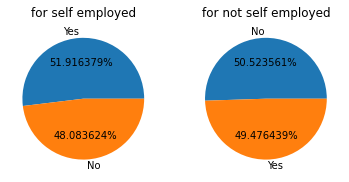

In [29]:
## A.1 
plt.subplot(1,2,1)
plt.title("for self employed")
plt.pie(df_eda[df_eda.self_employed==1]['diagnosed_mental_health_condition'].value_counts(),
       autopct='%1f%%',radius=1, 
       labels=df_eda[df_eda.self_employed==1]['diagnosed_mental_health_condition'].value_counts().index)

plt.subplot(1,2,2)
plt.title("for not self employed")
plt.pie(df_eda[df_eda.self_employed==0]['diagnosed_mental_health_condition'].value_counts(),
       autopct='%1f%%',radius=1, 
       labels=df_eda[df_eda.self_employed==0]['diagnosed_mental_health_condition'].value_counts().index)

Text(0.5, 1.0, 'Mental health in different size companies')

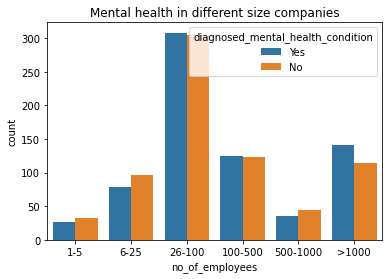

In [30]:
##A.2
sns.countplot(data=df_eda,x='no_of_employees',hue='diagnosed_mental_health_condition')
plt.title('Mental health in different size companies')

([<matplotlib.patches.Wedge at 0x7f1c90b087d0>,
 [Text(-0.019708651065785975, 1.0998234263158642, 'Yes'),
  Text(0.019708754038686934, -1.0998234244706022, 'No')],
 [Text(-0.01075017330861053, 0.5999036870813804, '50.570345%'),
  Text(0.010750229475647417, -0.5999036860748739, '49.429658%')])

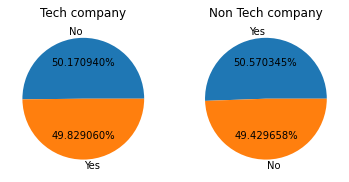

In [31]:
##A.3
plt.subplot(1,2,1)
plt.title("Tech company")
plt.pie(df_eda[df_eda.tech_company==1]['diagnosed_mental_health_condition'].value_counts(),
       autopct='%1f%%',radius=1, 
       labels=df_eda[df_eda.tech_company==1]['diagnosed_mental_health_condition'].value_counts().index)

plt.subplot(1,2,2)
plt.title("Non Tech company")
plt.pie(df_eda[df_eda.tech_company==0]['diagnosed_mental_health_condition'].value_counts(),
       autopct='%1f%%',radius=1,
       labels=df_eda[df_eda.tech_company==0]['diagnosed_mental_health_condition'].value_counts().index)

Text(0.5, 1.0, 'Mental health Discussion vs Daignostic Counts')

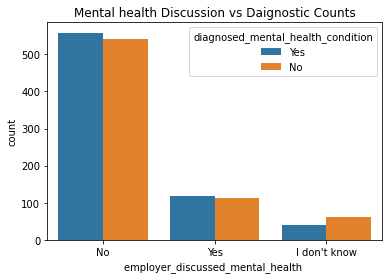

In [32]:
##A.4
sns.countplot(data=df_eda,x='employer_discussed_mental_health ',hue='diagnosed_mental_health_condition')
plt.title('Mental health Discussion vs Daignostic Counts')

Text(0.5, 1.0, 'Mental health Resource offering vs Daignostic Counts')

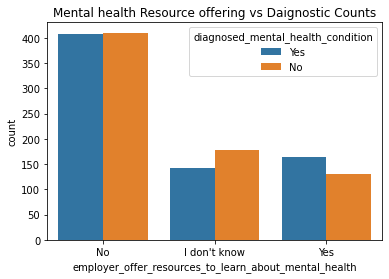

In [33]:
##A.5
sns.countplot(data=df_eda,x='employer_offer_resources_to_learn_about_mental_health',hue='diagnosed_mental_health_condition')
plt.title('Mental health Resource offering vs Daignostic Counts')

Text(0.5, 1.0, 'Asking for Leave vs Daignostic Counts')

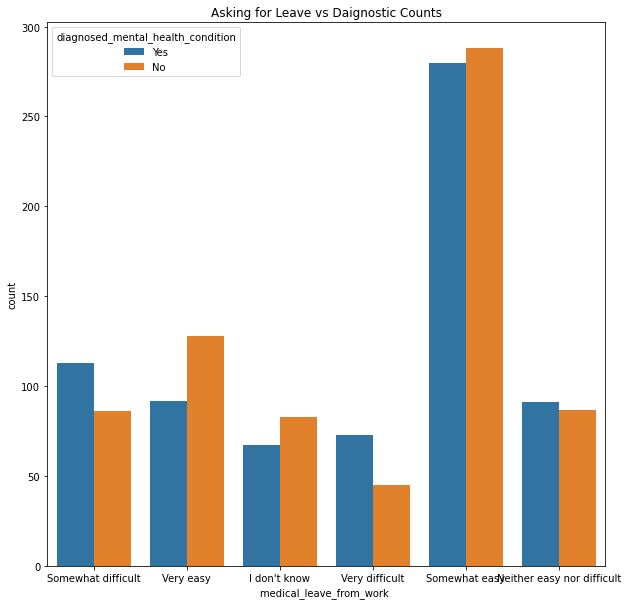

In [34]:
##A.6
plt.figure(figsize=(10,10))
sns.countplot(data=df_eda,x='medical_leave_from_work ',hue='diagnosed_mental_health_condition')
plt.title('Asking for Leave vs Daignostic Counts')

Text(0.5, 1.0, 'Discussion with co-workers vs Daignostic Counts')

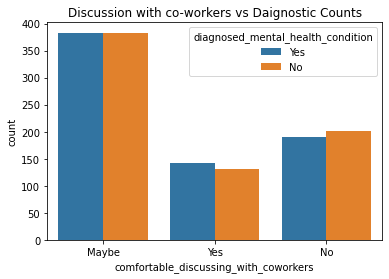

In [35]:
##A.7
sns.countplot(data=df_eda,x='comfortable_discussing_with_coworkers',hue='diagnosed_mental_health_condition')
plt.title('Discussion with co-workers vs Daignostic Counts')

Text(0.5, 1.0, 'Employers seriousness vs Daignostic Counts')

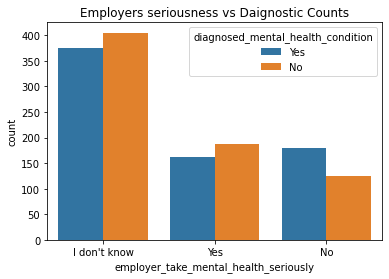

In [36]:
##A.8
sns.countplot(data=df_eda,x='employer_take_mental_health_seriously',hue='diagnosed_mental_health_condition')
plt.title('Employers seriousness vs Daignostic Counts')

Text(0.5, 1.0, 'Openess of Family&Friends vs Daignostic Counts')

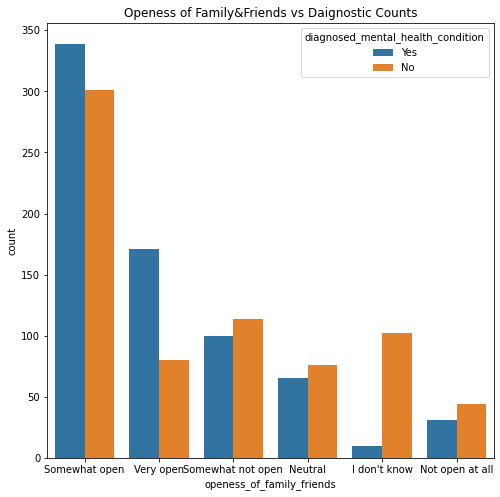

In [37]:
##A.9
plt.figure(figsize=(8,8))
sns.countplot(data=df_eda,x='openess_of_family_friends',hue='diagnosed_mental_health_condition')
plt.title('Openess of Family&Friends vs Daignostic Counts')

Text(0.5, 1.0, 'Family History vs Daignostic Counts')

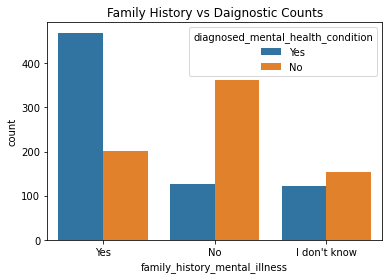

In [38]:
##A.10
sns.countplot(data=df_eda,x='family_history_mental_illness',hue='diagnosed_mental_health_condition')
plt.title('Family History vs Daignostic Counts')

([<matplotlib.patches.Wedge at 0x7f1c906db410>,
 [Text(-1.0833623634614518, 0.19059378120814285, 'No'),
  Text(1.083362359000282, -0.19059380656606933, 'Yes')],
 [Text(-0.5909249255244282, 0.10396024429535064, '94.456762%'),
  Text(0.5909249230910628, -0.10396025812694691, '5.543237%')])

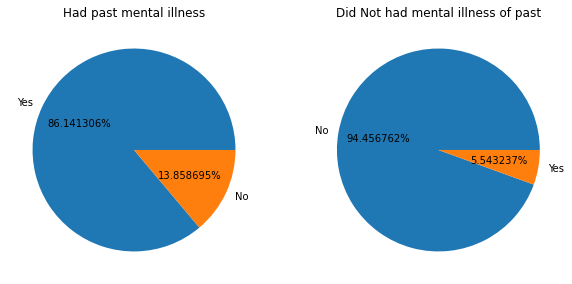

In [39]:
##A.11
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.title("Had past mental illness")
plt.pie(df_eda[df_eda.mental_health_disorder_past=='Yes']['diagnosed_mental_health_condition'].value_counts(),
       autopct='%1f%%',radius=1,
       labels=df_eda[df_eda.mental_health_disorder_past=='Yes']['diagnosed_mental_health_condition'].value_counts().index)

plt.subplot(1,2,2)
plt.title("Did Not had mental illness of past")
plt.pie(df_eda[df_eda.mental_health_disorder_past=='No']['diagnosed_mental_health_condition'].value_counts(),
       autopct='%1f%%',radius=1,
       labels=df_eda[df_eda.mental_health_disorder_past=='No']['diagnosed_mental_health_condition'].value_counts().index)

Text(0.5, 1.0, 'Self proclaimed disorder vs Daignostic Counts')

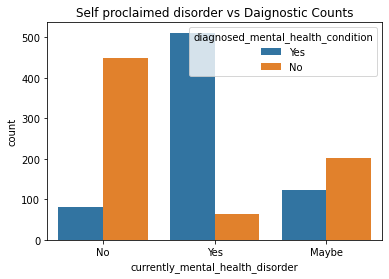

In [40]:
##A.12
sns.countplot(data=df_eda,x='currently_mental_health_disorder',hue='diagnosed_mental_health_condition')
plt.title('Self proclaimed disorder vs Daignostic Counts')

([<matplotlib.patches.Wedge at 0x7f1c90952810>,
 [Text(-1.0754761146685294, 0.2309786283998678, 'No'),
  Text(1.0754761092620841, -0.23097865357320332, 'Yes')],
 [Text(-0.5866233352737433, 0.12598834276356424, '93.265992%'),
  Text(0.5866233323247732, -0.1259883564944745, '6.734007%')])

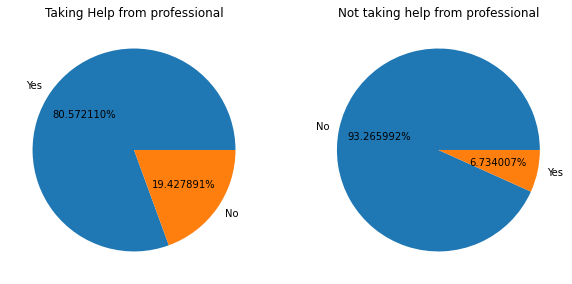

In [41]:
##A.13
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.title("Taking Help from professional")
plt.pie(df_eda[df_eda.treatment_from_professional==1]['diagnosed_mental_health_condition'].value_counts(),
       autopct='%1f%%',radius=1,
       labels=df_eda[df_eda.treatment_from_professional==1]['diagnosed_mental_health_condition'].value_counts().index)

plt.subplot(1,2,2)
plt.title("Not taking help from professional")
plt.pie(df_eda[df_eda.treatment_from_professional==0]['diagnosed_mental_health_condition'].value_counts(),
       autopct='%1f%%',radius=1,
       labels=df_eda[df_eda.treatment_from_professional==0]['diagnosed_mental_health_condition'].value_counts().index)

([<matplotlib.patches.Wedge at 0x7f1c90572310>,
 [Text(-0.387286831783129, 1.0295673411328599, 'Often'),
  Text(0.11082048010455826, -1.0944034087983259, 'Sometimes'),
  Text(1.0153415504745185, -0.4231802640483144, 'Rarely'),
  Text(1.0863057567337249, -0.1730312194003421, 'Not applicable to me'),
  Text(1.0997352976415675, -0.02413037756051461, 'Never')],
 [Text(-0.21124736279079762, 0.5615821860724689, '61.452514%'),
  Text(0.06044753460248632, -0.5969473138899958, '30.307263%'),
  Text(0.5538226638951919, -0.2308255985718078, '3.910615%'),
  Text(0.5925304127638499, -0.09438066512745932, '3.631285%'),
  Text(0.5998556168954003, -0.013162024123917057, '0.698324%')])

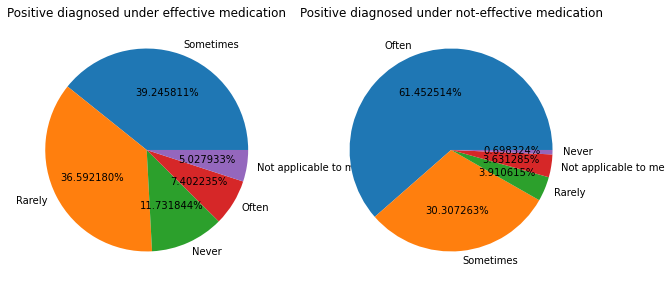

In [42]:
##A.14
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.title("Positive diagnosed under effective medication")
plt.pie(df_eda[df_eda.diagnosed_mental_health_condition=='Yes']['while_effective_treatment_mental_health_issue_interferes_work'].value_counts(),
       autopct='%1f%%',radius=1,
       labels=df_eda[df_eda.diagnosed_mental_health_condition=='Yes']['while_effective_treatment_mental_health_issue_interferes_work'].value_counts().index)

plt.subplot(1,2,2)
plt.title("Positive diagnosed under not-effective medication")
plt.pie(df_eda[df_eda.diagnosed_mental_health_condition=='Yes']['while_not_effective_treatment_interferes_work '].value_counts(),
       autopct='%1f%%',radius=1,
       labels=df_eda[df_eda.diagnosed_mental_health_condition=='Yes']['while_not_effective_treatment_interferes_work '].value_counts().index)

Text(0.5, 1.0, 'Negetive Diagonosis with age')

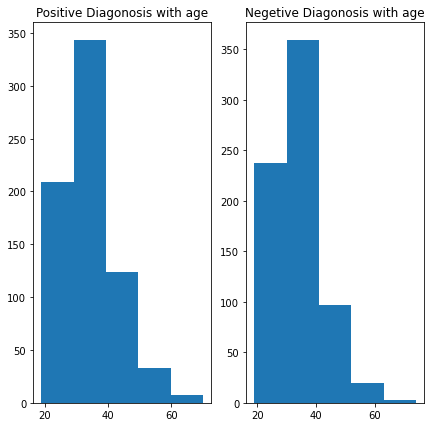

In [43]:
##A.15
plt.figure(figsize=(7,7))
plt.subplot(1,2,1)
plt.hist(df_eda[df_eda.diagnosed_mental_health_condition=='Yes']['age'],bins=5)
plt.title("Positive Diagonosis with age")

plt.subplot(1,2,2)
plt.hist(df_eda[df_eda.diagnosed_mental_health_condition=='No']['age'],bins=5)
plt.title("Negetive Diagonosis with age")

([<matplotlib.patches.Wedge at 0x7f1c90350d90>,
 [Text(-0.9829959488654123, 0.49367900959448124, 'Yes'),
  Text(0.9829959950869729, -0.4936789175597559, 'No')],
 [Text(-0.536179608472043, 0.2692794597788079, '85.185188%'),
  Text(0.5361796336838033, -0.26927940957804863, '14.814815%')])

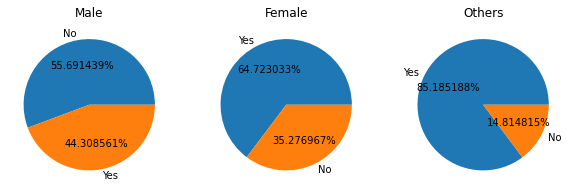

In [44]:
##A.16
plt.figure(figsize=(10,10))
plt.subplot(1,3,1)
plt.title("Male")
plt.pie(df_eda[df_eda.gender=='male']['diagnosed_mental_health_condition'].value_counts(),
       autopct='%1f%%',radius=1,
       labels=df_eda[df_eda.gender=='male']['diagnosed_mental_health_condition'].value_counts().index)

plt.subplot(1,3,2)
plt.title("Female")
plt.pie(df_eda[df_eda.gender=='female']['diagnosed_mental_health_condition'].value_counts(),
       autopct='%1f%%',radius=1,
       labels=df_eda[df_eda.gender=='female']['diagnosed_mental_health_condition'].value_counts().index)

plt.subplot(1,3,3)
plt.title("Others")
plt.pie(df_eda[df_eda.gender=='other']['diagnosed_mental_health_condition'].value_counts(),
       autopct='%1f%%',radius=1,
       labels=df_eda[df_eda.gender=='other']['diagnosed_mental_health_condition'].value_counts().index)

In [45]:
!pip install chart-studio

     |████████████████████████████████| 64 kB 710 kB/s 
You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


In [46]:
##A.17
import chart_studio.plotly as py 
import plotly.graph_objs as gobj
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot

In [47]:
data =dict( type = 'choropleth',
            locations = list(df_eda[df_eda.diagnosed_mental_health_condition=='Yes']['country'].value_counts().index),
            locationmode = 'country names',
            colorscale= 'Rainbow',
            z=list(df_eda[df_eda.diagnosed_mental_health_condition=='Yes']['country'].value_counts()),
            colorbar = {'title':'Country Colours', 'len':200,'lenmode':'pixels' })
layout = dict(geo = {'scope':'world'})
col_map=gobj.Figure(data = [data],layout = layout)
iplot(col_map)

([<matplotlib.patches.Wedge at 0x7f1c8f08dad0>,
 [Text(-0.03562008250107137, 1.0994231258813036, 'Yes'),
  Text(0.03562008250107123, -1.0994231258813039, 'No')],
 [Text(-0.01942913590967529, 0.5996853413898019, '51.030928%'),
  Text(0.019429135909675214, -0.599685341389802, '48.969072%')])

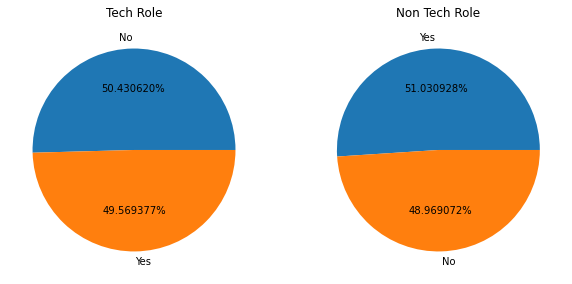

In [48]:
##A.20
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.title("Tech Role")
plt.pie(df_eda[df_eda.tech_role==1]['diagnosed_mental_health_condition'].value_counts(),
       autopct='%1f%%',radius=1,
       labels=df_eda[df_eda.tech_role==1]['diagnosed_mental_health_condition'].value_counts().index)

plt.subplot(1,2,2)
plt.title("Non Tech Role")
plt.pie(df_eda[df_eda.tech_role==0]['diagnosed_mental_health_condition'].value_counts(),
       autopct='%1f%%',radius=1,
       labels=df_eda[df_eda.tech_role==0]['diagnosed_mental_health_condition'].value_counts().index)

([<matplotlib.patches.Wedge at 0x7f1c8efcb750>,
 [Text(-0.15000672147010105, 1.089723810657449, 'No'),
  Text(0.15000661944279384, -1.089723824702087, 'Yes')],
 [Text(-0.08182184807460056, 0.5943948058131538, '54.354352%'),
  Text(0.08182179242334207, -0.5943948134738656, '45.645645%')])

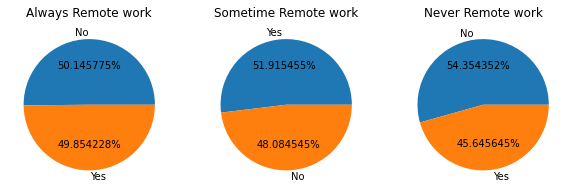

In [49]:
##A.21
plt.figure(figsize=(10,10))
plt.subplot(1,3,1)
plt.title("Always Remote work")
plt.pie(df_eda[df_eda.work_remotely=='Always']['diagnosed_mental_health_condition'].value_counts(),
       autopct='%1f%%',radius=1,
       labels=df_eda[df_eda.work_remotely=='Always']['diagnosed_mental_health_condition'].value_counts().index)

plt.subplot(1,3,2)
plt.title("Sometime Remote work")
plt.pie(df_eda[df_eda.work_remotely=='Sometimes']['diagnosed_mental_health_condition'].value_counts(),
       autopct='%1f%%',radius=1,
       labels=df_eda[df_eda.work_remotely=='Sometimes']['diagnosed_mental_health_condition'].value_counts().index)

plt.subplot(1,3,3)
plt.title("Never Remote work")
plt.pie(df_eda[df_eda.work_remotely=='Never']['diagnosed_mental_health_condition'].value_counts(),
       autopct='%1f%%',radius=1,
       labels=df_eda[df_eda.work_remotely=='Never']['diagnosed_mental_health_condition'].value_counts().index)

([<matplotlib.patches.Wedge at 0x7f1c8ef1b190>,
 [Text(-0.06464257105613563, 1.0980989654886542, 'Yes'),
  Text(0.06464257105613574, -1.0980989654886542, 'No')],
 [Text(-0.03525958421243761, 0.5989630720847204, '51.871657%'),
  Text(0.035259584212437675, -0.5989630720847204, '48.128343%')])

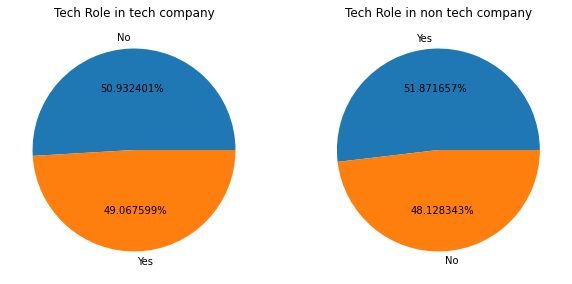

In [50]:
##A.22
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.title("Tech Role in tech company")
plt.pie(df_eda[(df_eda.tech_role==1) & (df_eda.tech_company==1)]['diagnosed_mental_health_condition'].value_counts(),
       autopct='%1f%%',radius=1,
       labels=df_eda[df_eda.tech_role==1]['diagnosed_mental_health_condition'].value_counts().index)

plt.subplot(1,2,2)
plt.title("Tech Role in non tech company")
plt.pie(df_eda[(df_eda.tech_role==1) & (df_eda.tech_company==0)]['diagnosed_mental_health_condition'].value_counts(),
       autopct='%1f%%',radius=1,
       labels=df_eda[df_eda.tech_role==0]['diagnosed_mental_health_condition'].value_counts().index)

([<matplotlib.patches.Wedge at 0x7f1c8ee8dd90>,
 [Text(-0.030151117190896082, 1.0995866996886334, 'Yes'),
  Text(-0.5050235705581543, -0.9772160422243861, 'No'),
  Text(0.9630061253565793, -0.5316194151135837, 'Maybe')],
 [Text(-0.01644606392230695, 0.5997745634665272, '50.872600%'),
  Text(-0.27546740212262955, -0.5330269321223924, '33.071554%'),
  Text(0.5252760683763159, -0.28997422642559106, '16.055846%')])

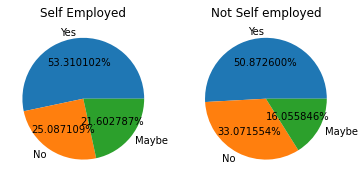

In [51]:
##B.1
plt.subplot(1,2,1)
plt.title("Self Employed")
plt.pie(df_eda[df_eda.self_employed==1]['mental_health_disorder_past'].value_counts(),
       autopct='%1f%%',radius=1, 
       labels=df_eda[df_eda.self_employed==1]['mental_health_disorder_past'].value_counts().index)

plt.subplot(1,2,2)
plt.title("Not Self employed")
plt.pie(df_eda[df_eda.self_employed==0]['mental_health_disorder_past'].value_counts(),
       autopct='%1f%%',radius=1, 
       labels=df_eda[df_eda.self_employed==0]['mental_health_disorder_past'].value_counts().index)

([<matplotlib.patches.Wedge at 0x7f1c8edba310>,
 [Text(-0.25106860689769006, 1.0709643106240532, '1'),
  Text(0.2510687071686046, -1.0709642871173088, '0')],
 [Text(-0.1369465128532855, 0.5841623512494835, '57.329845%'),
  Text(0.13694656754651158, -0.584162338427623, '42.670158%')])

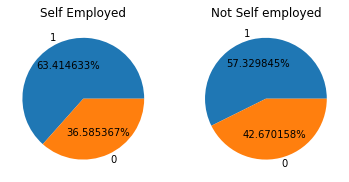

In [52]:
##B.2
plt.subplot(1,2,1)
plt.title("Self Employed")
plt.pie(df_eda[df_eda.self_employed==1]['treatment_from_professional'].value_counts(),
       autopct='%1f%%',radius=1, 
       labels=df_eda[df_eda.self_employed==1]['treatment_from_professional'].value_counts().index)

plt.subplot(1,2,2)
plt.title("Not Self employed")
plt.pie(df_eda[df_eda.self_employed==0]['treatment_from_professional'].value_counts(),
       autopct='%1f%%',radius=1, 
       labels=df_eda[df_eda.self_employed==0]['treatment_from_professional'].value_counts().index)

Text(0.5, 1.0, 'Company size vs Health care coverage')

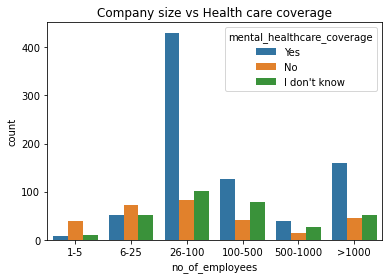

In [53]:
##B.3
sns.countplot(data=df_eda,x='no_of_employees',hue='mental_healthcare_coverage')
plt.title('Company size vs Health care coverage')

Text(0.5, 1.0, 'Company size vs Openess about mental health')

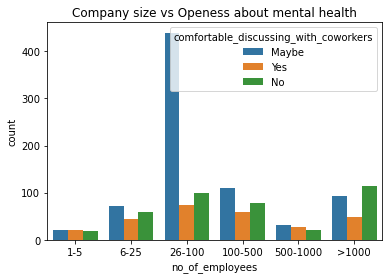

In [54]:
##B.4
sns.countplot(data=df_eda,x='no_of_employees',hue='comfortable_discussing_with_coworkers')
plt.title('Company size vs Openess about mental health')

([<matplotlib.patches.Wedge at 0x7f1c8ebbf3d0>,
 [Text(-0.44059807728808054, 1.0079054193177288, 'No'),
  Text(0.1506324301763201, -1.0896374952153474, 'Yes'),
  Text(1.058745387606376, -0.2984262123578033, "I don't know")],
 [Text(-0.24032622397531664, 0.5497665923551248, '63.117874%'),
  Text(0.08216314373253823, -0.5943477246629167, '28.136882%'),
  Text(0.5774974841489323, -0.16277793401334723, '8.745247%')])

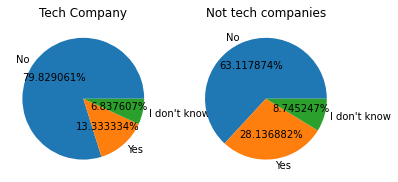

In [55]:
##B.5
plt.subplot(1,2,1)
plt.title("Tech Company")
plt.pie(df_eda[df_eda.tech_company==1]['employer_discussed_mental_health '].value_counts(),
       autopct='%1f%%',radius=1, 
       labels=df_eda[df_eda.tech_company==1]['employer_discussed_mental_health '].value_counts().index)

plt.subplot(1,2,2)
plt.title("Not tech companies")
plt.pie(df_eda[df_eda.tech_company==0]['employer_discussed_mental_health '].value_counts(),
       autopct='%1f%%',radius=1, 
       labels=df_eda[df_eda.tech_company==1]['employer_discussed_mental_health '].value_counts().index)

([<matplotlib.patches.Wedge at 0x7f1c8eadca50>,
 [Text(-0.05834680990910332, 1.0984514781151833, '1'),
  Text(0.058346809909102695, -1.0984514781151833, '0')],
 [Text(-0.03182553267769272, 0.5991553516991909, '51.689190%'),
  Text(0.03182553267769238, -0.5991553516991909, '48.310810%')])

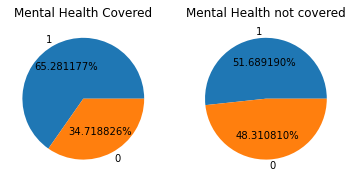

In [56]:
##B.6
plt.subplot(1,2,1)
plt.title("Mental Health Covered")
plt.pie(df_eda[df_eda.mental_healthcare_coverage=='Yes']['treatment_from_professional'].value_counts(),
       autopct='%1f%%',radius=1, 
       labels=df_eda[df_eda.mental_healthcare_coverage=='Yes']['treatment_from_professional'].value_counts().index)

plt.subplot(1,2,2)
plt.title("Mental Health not covered")
plt.pie(df_eda[df_eda.mental_healthcare_coverage=='No']['treatment_from_professional'].value_counts(),
       autopct='%1f%%',radius=1, 
       labels=df_eda[df_eda.mental_healthcare_coverage=='No']['treatment_from_professional'].value_counts().index)

([<matplotlib.patches.Wedge at 0x7f1c8ea890d0>,
 [Text(-0.2840207786894458, 1.062700426871393, '1'),
  Text(0.2840207786894455, -1.062700426871393, '0')],
 [Text(-0.1549204247396977, 0.579654778293487, '58.312958%'),
  Text(0.1549204247396975, -0.5796547782934871, '41.687042%')])

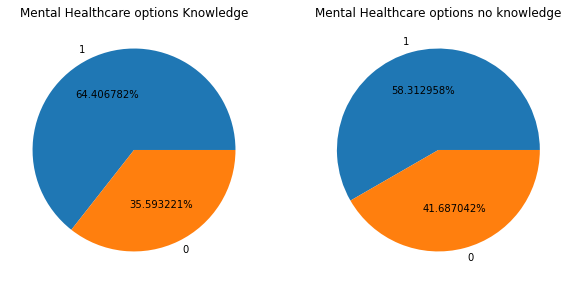

In [57]:
##B.7
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.title("Mental Healthcare options Knowledge")
plt.pie(df_eda[df_eda.employer_offer_resources_to_learn_about_mental_health=='Yes']['treatment_from_professional'].value_counts(),
       autopct='%1f%%',radius=1, 
       labels=df_eda[df_eda.employer_offer_resources_to_learn_about_mental_health=='Yes']['treatment_from_professional'].value_counts().index)

plt.subplot(1,2,2)
plt.title("Mental Healthcare options no knowledge")
plt.pie(df_eda[df_eda.employer_offer_resources_to_learn_about_mental_health=='No']['treatment_from_professional'].value_counts(),
       autopct='%1f%%',radius=1, 
       labels=df_eda[df_eda.employer_offer_resources_to_learn_about_mental_health=='No']['treatment_from_professional'].value_counts().index)


([<matplotlib.patches.Wedge at 0x7f1c8e9bd410>,
 [Text(0.21807097813164583, 1.078167449191779, 'Somewhat open'),
  Text(-1.09854150500076, -0.05662651137643169, 'Very open'),
  Text(-0.6373633449424054, -0.8965310739309755, "I don't know"),
  Text(0.266419245583799, -1.0672491675248847, 'Somewhat not open'),
  Text(0.9165788254046539, -0.6081802831560928, 'Neutral'),
  Text(1.0908949119861056, -0.14123841900427447, 'Not open at all')],
 [Text(0.11894780625362497, 0.5880913359227885, '43.647540%'),
  Text(-0.5992044572731418, -0.03088718802350819, '14.344262%'),
  Text(-0.3476527336049484, -0.48901694941689566, '14.344262%'),
  Text(0.14531958850025398, -0.582135909559028, '13.114753%'),
  Text(0.4999520865843566, -0.3317346999033233, '10.450820%'),
  Text(0.5950335883560576, -0.07703913763869516, '4.098361%')])

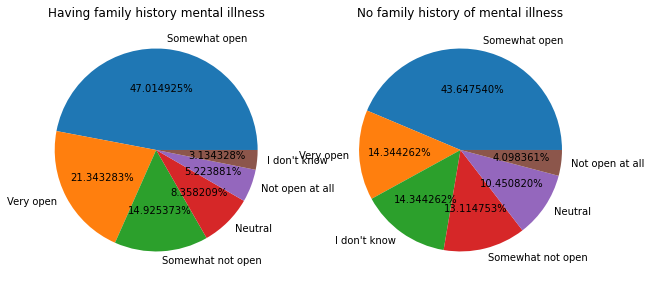

In [58]:
##B.8
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.title("Having family history mental illness")
plt.pie(df_eda[df_eda.family_history_mental_illness=='Yes']['openess_of_family_friends'].value_counts(),
       autopct='%1f%%',radius=1, 
       labels=df_eda[df_eda.family_history_mental_illness=='Yes']['openess_of_family_friends'].value_counts().index)
plt.subplot(1,2,2)
plt.title("No family history of mental illness")
plt.pie(df_eda[df_eda.family_history_mental_illness=='No']['openess_of_family_friends'].value_counts(),
       autopct='%1f%%',radius=1, 
       labels=df_eda[df_eda.family_history_mental_illness=='No']['openess_of_family_friends'].value_counts().index)

([<matplotlib.patches.Wedge at 0x7f1c8e8c6090>,
 [Text(-0.02303663990543217, 1.0997587522824575, '0'),
  Text(0.02303663990543179, -1.0997587522824575, '1')],
 [Text(-0.012565439948417547, 0.5998684103358859, '50.666666%'),
  Text(0.012565439948417339, -0.5998684103358859, '49.333334%')])

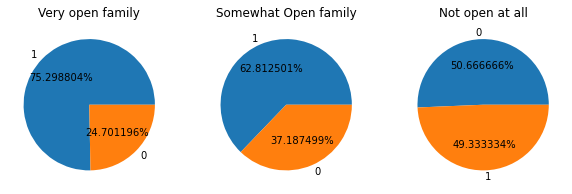

In [59]:
##B.9
plt.figure(figsize=(10,10))
plt.subplot(1,3,1)
plt.title("Very open family")
plt.pie(df_eda[df_eda.openess_of_family_friends=='Very open']['treatment_from_professional'].value_counts(),
       autopct='%1f%%',radius=1,
       labels=df_eda[df_eda.openess_of_family_friends=='Very open']['treatment_from_professional'].value_counts().index)
plt.subplot(1,3,2)
plt.title("Somewhat Open family")
plt.pie(df_eda[df_eda.openess_of_family_friends=='Somewhat open']['treatment_from_professional'].value_counts(),
       autopct='%1f%%',radius=1,
       labels=df_eda[df_eda.openess_of_family_friends=='Somewhat open']['treatment_from_professional'].value_counts().index)
plt.subplot(1,3,3)
plt.title("Not open at all")
plt.pie(df_eda[df_eda.openess_of_family_friends=='Not open at all']['treatment_from_professional'].value_counts(),
       autopct='%1f%%',radius=1,
       labels=df_eda[df_eda.openess_of_family_friends=='Not open at all']['treatment_from_professional'].value_counts().index)

<AxesSubplot:>

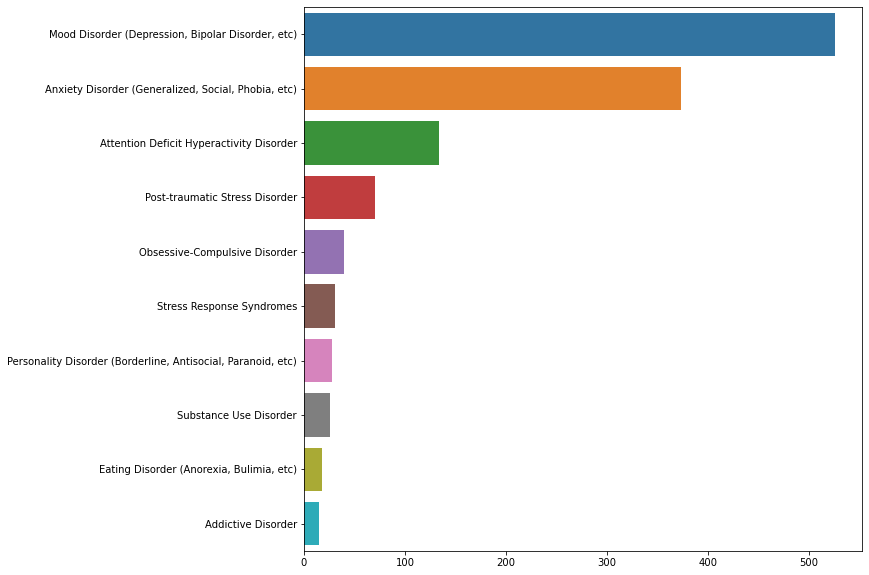

In [60]:
##B.10
disorder_type=pd.DataFrame(
    df_eda[df_eda.type_of_disorder.isnull() != True]['type_of_disorder'].str.split("|").tolist()).stack()
plt.figure(figsize=(10,10))
sns.barplot(x=disorder_type.value_counts()[0:10],y=disorder_type.value_counts().index[0:10])

## 4. ML Models

**Target Variable Column**: "diagnosed_mental_health_condition"

**Aim** : Here our main task is that knowing certain paramerters of the repondent's background we have to predict if one will be diagnosed positive or negetive.

**Stop Data Leakage**: So, now comes the important part where we have to stop data leakage. To stop Data leakage we have to drop certain columns which we can't have while making prediction. Like Treatment from professional column we might not know when we are making prediction because if one is diagnosed then one takes help from professional. These type of columns are like false target if we include it might train on that and then make prediction.

**Stop Train and Test contamination** : To stop this issue we have split the data then done all the preprocessing seperately.

#### 4.1 Data Preperation

In [61]:
## Dropping unnecessary columns
y=df_eda.diagnosed_mental_health_condition
X=df_eda.drop(['diagnosed_mental_health_condition','treatment_from_professional',
               'while_effective_treatment_mental_health_issue_interferes_work',
               'while_not_effective_treatment_interferes_work ','type_of_disorder','US state','US state work'],axis=1)

In [62]:
## Splitting the data
X_train,X_valid,y_train,y_valid=train_test_split(X,y,train_size=0.8,test_size=0.2,random_state=0)

In [63]:
cat_columns=['self_employed', 'no_of_employees', 'tech_company',
       'mental_healthcare_coverage',
       'knowledge_about_mental_healthcare_options_workplace',
       'employer_discussed_mental_health ',
       'employer_offer_resources_to_learn_about_mental_health',
       'medical_leave_from_work ', 'comfortable_discussing_with_coworkers',
       'employer_take_mental_health_seriously', 'openess_of_family_friends',
       'family_history_mental_illness', 'mental_health_disorder_past',
       'currently_mental_health_disorder', 'age', 'gender', 'country',
       'country work ', 'work_remotely', 'tech_role']

In [64]:
##Label Encode the data 
from sklearn.preprocessing import LabelEncoder
label_encode=LabelEncoder()
label_X_train=X_train.copy()
label_X_valid=X_valid.copy()

for col in cat_columns:
    label_X_train[col]=label_encode.fit_transform(X_train[col])
    label_X_valid[col] = label_X_valid[col].map(lambda s: '<unknown>' if s not in label_encode.classes_ else s)
    label_encode.classes_ = np.append(label_encode.classes_, '<unknown>')
    label_X_valid[col] = label_encode.transform(label_X_valid[col])

label_y_train=label_encode.fit_transform(y_train)
label_y_valid=label_encode.transform(y_valid)

/opt/conda/lib/python3.7/site-packages/numpy/lib/arraysetops.py:576: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



#### 4.2 Random Forest Model

In [65]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=1000, max_depth=10, random_state=0)
model.fit(label_X_train,label_y_train)
preds=model.predict(label_X_valid)

In [66]:
from sklearn.metrics import accuracy_score
accuracy_score(label_y_valid,preds)

0.926829268292683

#### 4.3 XGBoost Classifier

In [67]:
from xgboost import XGBClassifier
model1=XGBClassifier(n_estimators=1000,learning_rate=0.05)
model1.fit(label_X_train,label_y_train)

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[06:58:37] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=1000, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [68]:
preds1=model1.predict(label_X_valid)
accuracy_score(label_y_valid,preds1)

0.8745644599303136

#### 4.4 XGBoost Random Classifier

In [69]:
from xgboost import XGBRFClassifier
model2=XGBRFClassifier(n_estimators=1000,learning_rate=0.05)
model2.fit(label_X_train,label_y_train)

[06:58:39] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBRFClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                colsample_bytree=1, gamma=0, gpu_id=-1, importance_type='gain',
                interaction_constraints='', learning_rate=0.05,
                max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
                monotone_constraints='()', n_estimators=1000, n_jobs=4,
                num_parallel_tree=1000, objective='binary:logistic',
                random_state=0, reg_alpha=0, scale_pos_weight=1,
                tree_method='exact', validate_parameters=1, verbosity=None)

In [70]:
preds2=model2.predict(label_X_valid)
accuracy_score(label_y_valid,preds2)

0.9303135888501742

#### 4.5 Logistic Regression

In [71]:
from sklearn.linear_model import LogisticRegression
logistic=LogisticRegression(C=1,penalty='l1',solver='liblinear',random_state=0)
logistic.fit(label_X_train,label_y_train)
preds3=logistic.predict(label_X_valid)
accuracy_score(label_y_valid,preds3)

0.8710801393728222